In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
%matplotlib inline

In [3]:

from keras.layers import Dense, Flatten, Activation, MaxPooling2D, Lambda, Dropout
from keras.models import Sequential
from keras.layers.core import Lambda
from keras.layers import Conv2D, Cropping2D 
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

Using TensorFlow backend.


In [6]:
# generator

# read the csv file
driving_df_1 = pd.read_csv('data1/driving_log_1.csv')
driving_df_2 = pd.read_csv('data1/driving_log_2.csv')

In [4]:
driving_df_1.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [7]:

def get_images_filenames_measurements(dataframe):

    filenames = []
    measurements = []
    
    correction = 0.2

    for index, row in dataframe.iterrows():
        center_text = row[0]
        center_i = center_text.find('center')
        center_filename = center_text[center_i:]
        #center_filenames.append(center_filename)
        center_measure = float(row[3])
        filenames.append(center_filename)
        measurements.append(center_measure)
        left_text = row[1]
        left_i = left_text.find('left')
        left_filename = left_text[left_i:]
        #left_filenames.append(left_filename)
        left_measure = center_measure + correction
        #left_measures.append(left_measure)
        filenames.append(left_filename)
        measurements.append(left_measure)
        right_text = row[2]
        right_i = right_text.find('right')
        right_filename = right_text[right_i:]
        #right_filenames.append(right_filename)
        right_measure = center_measure - correction
        filenames.append(right_filename)
        measurements.append(right_measure)
        #right_measures.append(right_measure)
    
        
    return filenames, measurements
        
    

In [8]:
filenames_1, measurements_1 = get_images_filenames_measurements(driving_df_1)
filenames_2, measurements_2 = get_images_filenames_measurements(driving_df_2)

In [9]:
#print(filenames_2[200:204])
#print(len(filenames_2))
#print(filenames_1)
# handle flips
# add 'f' to the front
# negate measurements



filenames = np.append(np.asarray(filenames_1), np.asarray(filenames_2))
measurements = np.append(np.asarray(measurements_1), np.asarray(measurements_2))

flips_filenames = []

for each in filenames:
    flips_filenames.append('f'+each)
    
flips_measurements = - np.asarray(measurements)

total_filenames = np.append(np.asarray(filenames), np.asarray(flips_filenames))
total_measurements = np.append(np.asarray(measurements), np.asarray(flips_measurements))


In [14]:
print(len(total_filenames))
print(len(total_measurements))
print(len(filenames_2))

67872
67872
9828


In [11]:
print(len(total_filenames))
print(len(total_measurements))

67872
67872


In [57]:
#print(len(images_filenames))
#gray = plt.imshow(images[0], cmap='gray')
#plt.imsave('gray_sample.jpg', gray)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(total_filenames, total_measurements, test_size=0.25, random_state=101)

In [13]:
# augmentation

# already done grayscale
# normalization
#def normalize_pixels(data):
#    return (data.astype(float) - 128) / 128
    
#X_train_norm = normalize_pixels(np.asarray(X_train))
#X_valid_norm = normalize_pixels(np.asarray(X_valid))
#X_test_norm = normalize_pixels(np.asarray(X_test))

# create the generator to perform online data augmentation
#image_generator = ImageDataGenerator(
#                                horizontal_flip = True)
#                                zoom_range = 0.1)
#                                rotation_range = 10)
#                                width_shift_range=0.2,
#                                height_shift_range=0.2)

# flip images horizontally to solve left turn bias
#print(X_train[0])

def flip_images(data):
    #flipped_filenames = []
    count = 0
    for i in range(0, len(data)):
        filename = data[i]
        current_path = 'data1/t2_v3/IMG/' + filename
        image = mpimg.imread(current_path)
        #plt.imshow(image)
        flipped_image = np.fliplr(image)
        #plt.imshow(flipped_image)
        # save image to 'data/IMG/'
        plt.imsave('data1/IMG45/'+'f'+filename, flipped_image)
        plt.close('all')
        if i%200 == 0:
            print("200 processed")
            print("count: "+str(count))
        count += 1
        #print(filename)
        #plt.savefig('data/IMG/'+'f'+filename)
        
flip_images(filenames_2)



200 processed
count: 0
200 processed
count: 200
200 processed
count: 400
200 processed
count: 600
200 processed
count: 800
200 processed
count: 1000
200 processed
count: 1200
200 processed
count: 1400
200 processed
count: 1600
200 processed
count: 1800
200 processed
count: 2000
200 processed
count: 2200
200 processed
count: 2400
200 processed
count: 2600
200 processed
count: 2800
200 processed
count: 3000
200 processed
count: 3200
200 processed
count: 3400
200 processed
count: 3600
200 processed
count: 3800
200 processed
count: 4000
200 processed
count: 4200
200 processed
count: 4400
200 processed
count: 4600
200 processed
count: 4800
200 processed
count: 5000
200 processed
count: 5200
200 processed
count: 5400
200 processed
count: 5600
200 processed
count: 5800
200 processed
count: 6000
200 processed
count: 6200
200 processed
count: 6400
200 processed
count: 6600
200 processed
count: 6800
200 processed
count: 7000
200 processed
count: 7200
200 processed
count: 7400
200 processed
count

In [58]:
#current_path = 'data/IMG/' + 'f'+X_train[1]
#image = mpimg.imread(current_path)
#plt.imshow(image)
print(len(X_train))

14511


(160, 320, 3)

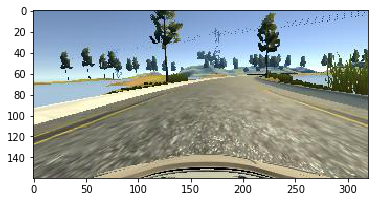

In [9]:
# merge flips images and original images
#d = np.append(a, b, axis=0)
# create flips images filenames

#flips_filenamess = 'f'+ x for x in X_train
#function = lambda x: ('f'+x for x in X_train)

#flips_filenames = X_train.apply(function)
'''
current_path = 'data/IMG/' + 'center_2016_12_01_13_46_01_135.jpg'
image = mpimg.imread(current_path)
flipped_image = np.fliplr(image)
plt.imshow(flipped_image)
plt.imsave('center_2016_12_01_13_46_01_135.jpg', flipped_image)
flipped_image.shape
'''


In [18]:
print(len(y_train)) 
print(X_train[10000])
print(y_train[10000])

12054
fcenter_2016_12_01_13_46_01_135.jpg
-0.0


In [59]:
def generator(X_data, y_data, batch_size):
    
    num_samples = len(X_data)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = []
            batch_y = []
            X_data_range, y_data_range = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            if len(X_data_range) < batch_size:
                break
            for i in range(0, batch_size):
                filename = X_data_range[i]
                current_path = 'data/IMG3/' + filename
                #print(current_path)
                batch_x_one = cv2.imread(current_path)
                #batch_x_one = cv2.cvtColor(batch_x_one, cv2.COLOR_BGR2GRAY)
                #batch_x_one = np.expand_dims(batch_x_one[:, :], 2)
                batch_x.append(batch_x_one)
                batch_y.append(y_data_range[i])
        #batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            batch_x = np.asarray(batch_x)
            #batch_x = batch_x.reshape(-1, 160, 320, 3)
            batch_y = np.asarray(batch_y)
            batch_x, batch_y = shuffle(batch_x, batch_y)
            yield batch_x, batch_y
    
batch_x, batch_y = next(generator(X_train, y_train, 32))


In [60]:
batch_size = 32
epochs = 5

In [61]:
#X_train_merged, y_train_merged = shuffle(X_train_merged, y_train_merged)
train_generator = generator(X_train, y_train, batch_size)
valid_generator = generator(X_valid, y_valid, batch_size)

In [22]:
#plt.imshow(batch_x[31], cmap='gray')
print(len(batch_x))
print(len(batch_x[0]))
print(batch_x[0].shape)

32
288
(288, 432, 1)


In [62]:
adam = Adam(lr=0.000005, beta_1=0.9, beta_2=0.999)
len(y_train)


14511

In [63]:
model = Sequential()

# crop the some of the top and bottom to make image more relevant
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,1)))

# doing the normalizaton
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(110,300,1)))
#model.add(Cropping2D(cropping=((50,20), (0,0))))
# convolution layer 1, with input: x1 output: x24
model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 1, with input: x24 output: x24
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# convolution layer 2, with input: x24, output: x36
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 2, with input: x36 output: x36
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# convolution layer 3, with input: x36, output: x48
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 3, with input: x48, output: x48
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# flatten the inputs, prepared for the fully connected layer
model.add(Flatten())
# fully connected layer 1, with input x48, output: 1024
model.add(Dense(1024))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# apply regularization, with a dropout probability of 50%
model.add(Dropout(0.5))
# fully connected layer 2, with input 1024, output: 256
model.add(Dense(256))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
# output layer, with input: 256, output 1
model.add(Dense(1))

model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
model.summary()

C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, kernel_size=(5, 5), padding="same", strides=(2, 2))`
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=48, kernel_size=(5, 5), padding="same", strides=(2, 2))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 90, 320, 1)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 90, 320, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 160, 16)       416       
_________________________________________________________________
activation_1 (Activation)    (None, 45, 160, 16)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 159, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 80, 48)        19248     
_________________________________________________________________
activation_2 (Activation)    (None, 22, 80, 48)        0         
__________

In [64]:

model.fit_generator(train_generator, 
                    samples_per_epoch=len(X_train), 
                    steps_per_epoch=len(X_train)/batch_size,
                    validation_data=valid_generator,
                    validation_steps=len(X_valid)/batch_size,
                    verbose=1,
                    shuffle=True,
                    nb_epoch=epochs)

C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=14511, validation_data=<generator..., validation_steps=151.15625, verbose=1, shuffle=True, epochs=5)`


Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor with shape[1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_1/bias/Assign = Assign[T=DT_FLOAT, _grappler_relax_allocator_constraints=true, use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/bias, dense_1/Const)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense_1/bias/Assign', defined at:
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-a28ab6f68011>", line 32, in <module>
    model.add(Dense(1024))
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\sequential.py", line 185, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\layers\core.py", line 867, in build
    constraint=self.bias_constraint)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py", line 400, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 259, in __init__
    constraint=constraint)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 412, in _init_from_args
    validate_shape=validate_shape).op
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\state_ops.py", line 216, in assign
    validate_shape=validate_shape)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 60, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\hon89\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: dense_1/bias/Assign = Assign[T=DT_FLOAT, _grappler_relax_allocator_constraints=true, use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/bias, dense_1/Const)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
'''
filename = 'fcenter_2016_12_01_13_37_56_368.jpg'
current_path = 'data/IMG2/' + filename
print(current_path)
x = cv2.imread(current_path)
plt.imshow(x)
'''

In [ ]:
model.save('model2.h5')